In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler, ADASYN, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터스쿨/실습파일/ML_project/dataset.csv', index_col=0)
exited = {'Existing Customer': 0, 'Attrited Customer':1}
gender = {'M':0, 'F':1}
education = {'Uneducated': 0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate': 4, 'Doctorate':5, 'Unknown':6}
marital = {'Single':0, 'Married': 1, 'Divorced':2, 'Unknown':3}
income = {'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5}
card = {'Blue':0, 'Silver':1 , 'Gold': 2, 'Platinum': 3}
df['Exited'] = df['Exited'].map(exited)
df['Gender'] = df['Gender'].map(gender)
df['Education'] = df['Education'].map(education)
df['Marital'] = df['Marital'].map(marital)
df['Income'] = df['Income'].map(income)
df['Card_type'] = df['Card_type'].map(card)
df.head()

,Exited,Age,Gender,Dependents,Education,Marital,Income,Card_type,Tenure,Product_Cnt,Inactive_Months,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,0.061,1144,42,1.335,1.625
1,0,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,0.105,1291,33,1.541,3.714
2,0,51,0,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,0.000,1887,20,2.594,2.333
3,0,40,1,4,1,3,0,0,34,3,4,1,3313.0,2517,796.0,0.760,1171,20,1.405,2.333
4,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,0.000,816,28,2.175,2.500


### 1. correlation

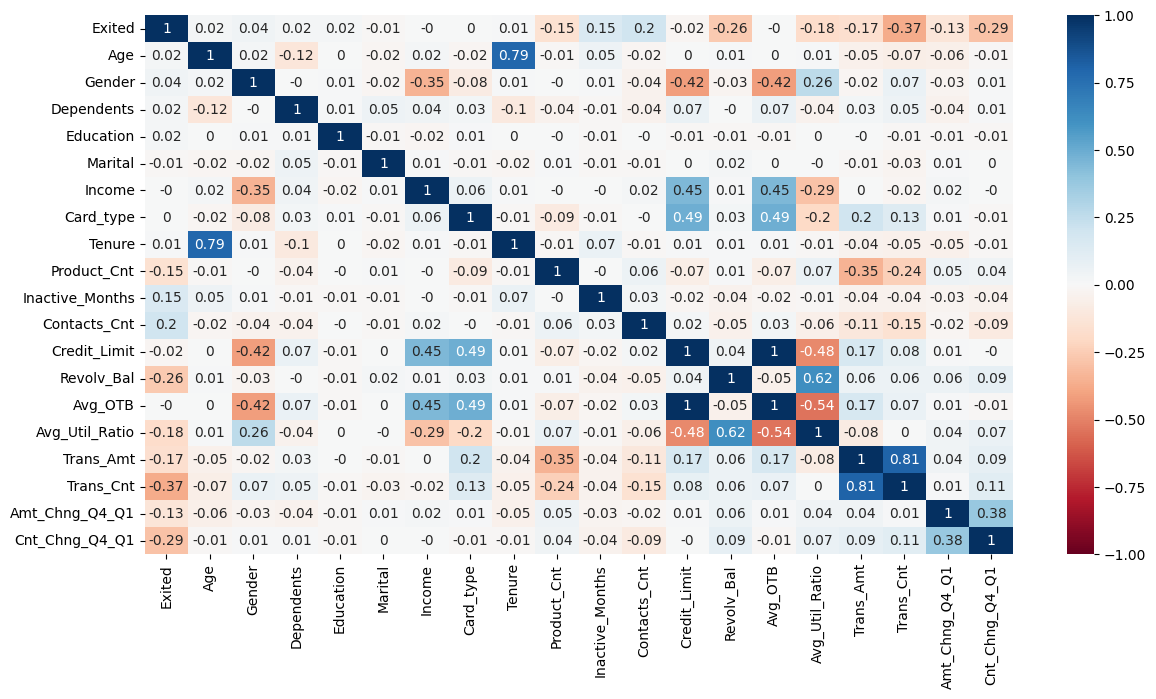

In [ ]:
correlation = df.corr(numeric_only=True).round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()

### 2. Feature 개수 & 정확도

- **LogisticRegression**

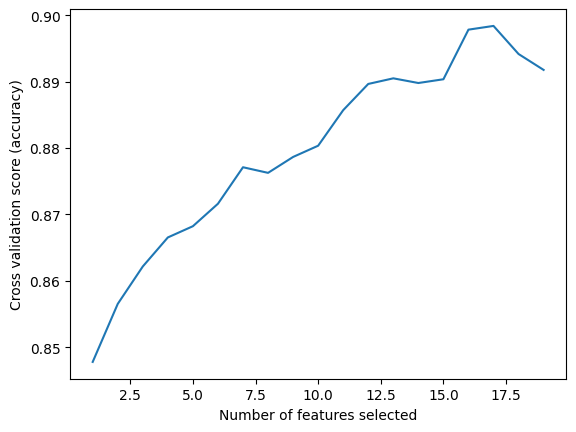

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

min_features_to_select = 1
step = 1

scaler = StandardScaler()
clf = LogisticRegression(solver='liblinear', random_state=13)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
selector = RFECV(estimator=clf, step=step, cv=skfold, min_features_to_select=min_features_to_select)

pipe = Pipeline([('feature_selection', selector), ('scaler', scaler), ('clf', clf)])

pipe.fit(X_train, y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(pipe.named_steps['feature_selection'].cv_results_['mean_test_score'])*step + min_features_to_select, step),
    pipe.named_steps['feature_selection'].cv_results_['mean_test_score'],
)
plt.show()

- **randomforest**

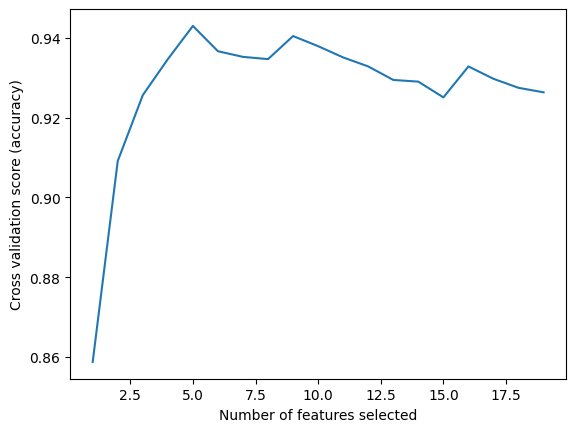

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

min_features_to_select = 1
step = 1

scaler = StandardScaler()
clf = RandomForestClassifier(max_depth=6, random_state=13, n_jobs=-1)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
selector = RFECV(estimator=clf, step=step, cv=skfold, min_features_to_select=min_features_to_select)

pipe = Pipeline([('feature_selection', selector), ('scaler', scaler), ('clf', clf)])

pipe.fit(X_train, y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(pipe.named_steps['feature_selection'].cv_results_['mean_test_score'])*step + min_features_to_select, step),
    pipe.named_steps['feature_selection'].cv_results_['mean_test_score'],
)
plt.show()

- **XGBClassifier**

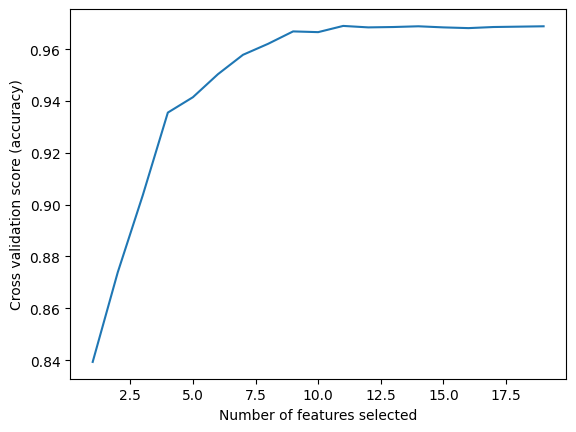

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

min_features_to_select = 1
step = 1

scaler = StandardScaler()
clf = XGBClassifier(n_estimators=100, max_depth=6 ,random_state=13, use_label_encoder=False)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
selector = RFECV(estimator=clf, step=step, cv=skfold, min_features_to_select=min_features_to_select)

pipe = Pipeline([('feature_selection', selector), ('scaler', scaler), ('clf', clf)])

pipe.fit(X_train, y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(pipe.named_steps['feature_selection'].cv_results_['mean_test_score'])*step + min_features_to_select, step),
    pipe.named_steps['feature_selection'].cv_results_['mean_test_score'],
)
plt.show()

---

### 3. 모델 정확도

In [ ]:
def pd_score(models, X, y, scale):

  scores = []

  for model in models:
    pipe = Pipeline([('scaler', scale), ('clf', model)])
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    model_name = str(model)
    acc = cross_val_score(pipe, X, y, scoring='accuracy', cv=skfold).mean()
    pre = cross_val_score(pipe, X, y, scoring='precision', cv=skfold).mean()
    re = cross_val_score(pipe, X, y, scoring='recall', cv=skfold).mean()
    f1 = cross_val_score(pipe, X, y, scoring='f1', cv=skfold).mean()

    scores.append([model_name, acc, pre, re, f1])

  df = pd.DataFrame(scores, columns=['name', 'accuracy', 'precision', 'recall', 'f1'])

  return df

**전체 컬럼**

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']
scaler = StandardScaler()

logistic = LogisticRegression(solver='liblinear', random_state=13)
randomforest = RandomForestClassifier(max_depth=6, random_state=13, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
xgb = XGBClassifier(n_estimators=100, max_depth=6 ,random_state=13, use_label_encoder=False)

models = [logistic, randomforest, knn, nb, xgb]

result = pd_score(models, X, y, scaler)
result.head()

,name,accuracy,precision,recall,f1
0,"LogisticRegression(random_state=13, solver='li...",0.904809,0.770185,0.582633,0.662714
1,"RandomForestClassifier(max_depth=6, n_jobs=-1,...",0.927422,0.895657,0.620766,0.733217
2,KNeighborsClassifier(),0.906389,0.813830,0.541487,0.650174
3,GaussianNB(),0.887726,0.650924,0.650871,0.650623
4,"XGBClassifier(base_score=None, booster=None, c...",0.971265,0.933736,0.883830,0.908086


- **8개 컬럼**

In [ ]:
X = df[['Product_Cnt', 'Inactive_Months', 'Revolv_Bal', 'Avg_Util_Ratio', 'Trans_Amt', 'Trans_Cnt', 'Amt_Chng_Q4_Q1','Cnt_Chng_Q4_Q1']]
y = df['Exited']
scaler = StandardScaler()

logistic = LogisticRegression(solver='liblinear', random_state=13)
randomforest = RandomForestClassifier(max_depth=6, random_state=13, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
xgb = XGBClassifier(n_estimators=100, max_depth=6 ,random_state=13, use_label_encoder=False)

models = [logistic, randomforest, knn, nb, xgb]

result = pd_score(models, X, y, scaler)
result.head()

,name,accuracy,precision,recall,f1
0,"LogisticRegression(random_state=13, solver='li...",0.896218,0.739647,0.548838,0.629356
1,"RandomForestClassifier(max_depth=6, n_jobs=-1,...",0.934433,0.893580,0.672389,0.767165
2,KNeighborsClassifier(),0.930385,0.848893,0.690822,0.761249
3,GaussianNB(),0.880024,0.625167,0.635511,0.629918
4,"XGBClassifier(base_score=None, booster=None, c...",0.962279,0.902100,0.858630,0.879711


- **9개 컬럼**

In [ ]:
X = df[['Product_Cnt', 'Inactive_Months', 'Contacts_Cnt', 'Revolv_Bal', 'Avg_Util_Ratio', 'Trans_Amt', 'Trans_Cnt', 'Amt_Chng_Q4_Q1','Cnt_Chng_Q4_Q1']]
y = df['Exited']
scaler = StandardScaler()

logistic = LogisticRegression(solver='liblinear', random_state=13)
randomforest = RandomForestClassifier(max_depth=6, random_state=13, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
xgb = xgb.XGBClassifier(n_estimators=100, max_depth=6 ,random_state=13, use_label_encoder=False)

models = [logistic, randomforest, knn, nb, xgb]

result = pd_score(models, X, y, scaler)
result.head()

,name,accuracy,precision,recall,f1
0,"LogisticRegression(random_state=13, solver='li...",0.898292,0.742063,0.564819,0.640557
1,"RandomForestClassifier(max_depth=6, n_jobs=-1,...",0.940752,0.889831,0.720934,0.796117
2,KNeighborsClassifier(),0.928311,0.840770,0.685297,0.754543
3,GaussianNB(),0.883382,0.634364,0.650250,0.641772
4,"XGBClassifier(base_score=None, booster=None, c...",0.964748,0.908250,0.868459,0.887775
